Kévin TANG

Yann VINCENT

# TP2 Node2Vec Classification de noeuds

In [ ]:
import networkx
import numpy
import matplotlib
import torch
import sklearn
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=e81c5fbc6311133d8fb3a6ff27d17cb5f6d91fb181d00b3c308191e4979a42fa
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=39e127c214d80b63515f127675baec08e4f3e4f219b5c579064fe5ac52db7b30
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torc

## Partie 1 (La classe Node2vec) :
Lisez bien la documentation de la classe Node2vec du PyG, et répondez aux questions suivantes :
Lien vers la documentation : https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html?highlight=Node2vec#torch_geometric.nn.models.Node2Vec

**Quelle est la différence entre le paramètre walk_length et context_size ?**

walk_length concerne la longueur de la marche aléatoire, donc le nombre de noeuds que le marcheur visite.

context_size concerne la portée des noeuds adjacents que l'on prend en compte dans le contexte. Par exemple, si context_size est fixé à 2, alors pour chaque nœud visité pendant la marche, on considère les deux nœuds adjacents à gauche et les deux nœuds adjacents à droite comme faisant partie du contexte.

***Soit M une marche aléatoire M={u ,s_1, s_2, s_4, s_5, s_6}, et supposant que context_size = 3, combien d’échantillons positifs peut-on générer de cette marche ? ***

Pour le noeuds u, il y a 3 échantillons positifs : {s_1, s_2, s_4}.

Pour le noeuds s_1, il y a 3 échantillons positifs : {u, s_2, s_4, s_5}.

Pour le noeuds s_2, il y a 3 échantillons positifs : {u ,s_1, s_4, s_5, s_6}.

Pour le noeuds s_4, il y a 3 échantillons positifs : {u ,s_1, s_2, s_5, s_6}.

Pour le noeuds s_5, il y a 3 échantillons positifs : {s_1, s_2, s_4, s_6}.

Pour le noeuds s_6, il y a 3 échantillons positifs : {s_2, s_4, s_5}.

**À quoi sert le paramètre num_negative_samples ?**

num_negative_samples définit le nombre d'échantillons négatifs à prendre en compte pour chaque échantillon positif, ce qui permet au modèle d'avoir un équilibre et un entraînement plus stable entre les échantillons positifs et négatifs.

***Comment sont générées les marches négatives ? ***

Une fois que les marches aléatoires sont générées, les exemples négatifs sont obtenus en échantillonnant des paires de nœuds qui ne sont pas connectées dans le graphe sous-jacent. Cet échantillonnage se fait en prenant des paires de nœuds non connectées dans le graphe et en les ajoutant à la liste des exemples négatifs.

***Que retourne le  loader de Node2vec ? ***

Le loader de Node2Vec retourne des données structurées de manière à faciliter l'entraînement du modèle. Ces données comprennent des séquences de marches aléatoires, des paires de nœuds (positifs et négatifs) et les labels associés.

## Partie 2 : Classification des noeuds avec Node2vec

Dans cet exemple, nous allons utilisé la bibliothéque PyG. PyG (PyTorch Geometric) est une bibliothèque basée sur PyTorch pour écrire et modeliser facilement des réseaux de neurones sur les graphes (GNN) pour un large éventail d'applications liées aux données de type graphe.

Cette bibliothéque se compose de diverses méthodes d'apprentissage profond sur les graphes, également appelées méthodes  d'apprentissage profond géométriques, à partir d'une variété d'articles publiés.

Installation : Suivre les etapes du fichier requirements.txt

Documentation :  https://pytorch-geometric.readthedocs.io/en/latest/


### Le réseau CORA

Le graphe CORA est un réseau de citations contenant 2708 noeuds représentant des publications scientifiques classées en 7 classes et 5429 arêtes.

In [ ]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

In [ ]:
dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)
data = dataset[0]

Processing...
Done!


### Question 1 :
Transformez le dataset en graphe networkx et visualisez le graphe : les noeuds doivent etre colorés selon leur classe d'appartenance.

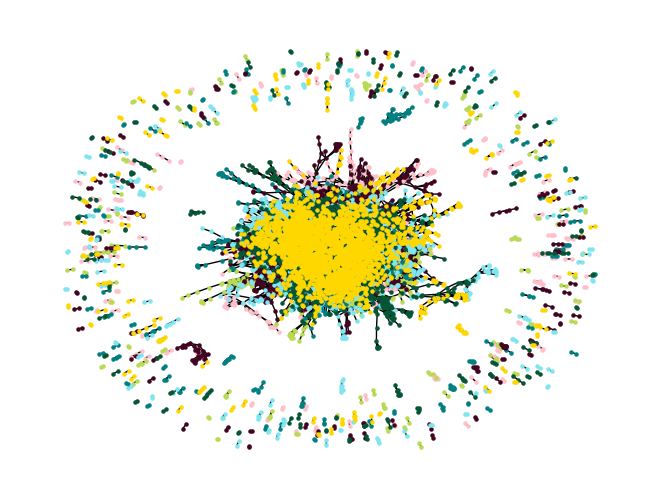

In [ ]:
import networkx as nx

########################Votre code ici ##############################
# à faire : Créer le graphe networkx à partir de la liste des aretes

G = nx.Graph()
G.add_edges_from(data.edge_index.t().tolist())

# Créer une liste des classes pour chaque nœud
node_classes = [int(c) for c in data.y]

# à faire : Remplir les listes des 7 classes
# utilisez data.y qui contient les classes
Classes = {}
Classes[0] = [node for node, node_class in enumerate(node_classes) if node_class == 0]
Classes[1] = [node for node, node_class in enumerate(node_classes) if node_class == 1]
Classes[2] = [node for node, node_class in enumerate(node_classes) if node_class == 2]
Classes[3] = [node for node, node_class in enumerate(node_classes) if node_class == 3]
Classes[4] = [node for node, node_class in enumerate(node_classes) if node_class == 4]
Classes[5] = [node for node, node_class in enumerate(node_classes) if node_class == 5]
Classes[6] = [node for node, node_class in enumerate(node_classes) if node_class == 6]


# à completer
colors = [ '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535','#ffd700']
for c in range(7):
   nx.draw(G,pos = nx.spring_layout(G), with_labels = False, node_color=colors[c] ,node_size=5 )


### Question 2 :
Définir le modele Node2vec avec les parametres suivants:

 - longeur de la marche = 20
 - Taille du contexte = 10
 - Nombre de marches aléatoires par noeud = 20
 - p = 0.25 et q = 4
 - Sparse = True


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# à faire : Définir le modele Node2vec

############################### Votre code ici ##########################
walk_length = 20
context_size = 10
walks_per_node = 20
p = 0.25
q = 4
sparse = True

model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=walk_length, context_size=context_size, walks_per_node=walks_per_node, p=p, q=q, sparse=sparse)
#########################################################################

### Question 3 :

En utilisant le loader générer les marches aléatoires positives et négatives, Afficher quelques uns.

In [ ]:
# Code node2vec : https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/models/node2vec.html#Node2Vec
# Votre code ici
# loader = ...................

In [ ]:
from torch_geometric.data import DataLoader

loader = model.loader(batch_size=1, shuffle=True)

# Afficher quelques marches aléatoires positives
for pos_rw in loader:
    print('Marche positive :')
    print(pos_rw)
    print()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
        ...,
        [1936,   58, 1284,  ...,  219, 1575,  677],
        [ 740,  767, 2492,  ...,  983, 1006, 1402],
        [ 978, 1002,  618,  ..., 1163, 1450,  875]]))

Marche positive :
(tensor([[2706,  169, 2706,  ..., 2707, 2706, 2707],
        [2706, 1473, 2707,  ...,  165, 1473,  598],
        [2706,  169, 2706,  ..., 1473, 2706, 1473],
        ...,
        [ 165,  598,  165,  ..., 2707, 2706, 2707],
        [ 165, 2707, 1473,  ..., 2707, 2706, 2707],
        [2706,  169, 2706,  ..., 1473, 2707, 1473]]), tensor([[2706, 1741,  220,  ...,  438, 1901, 1333],
        [2706, 1673,  789,  ...,  121, 1844, 2128],
        [2706, 1586, 1715,  ...,  302,  822, 1254],
        ...,
        [ 701, 2222,  688,  ...,  963, 1016,  355],
        [ 213,  930, 1838,  ..., 2238,  915, 2040],
        [ 219, 1391, 2106,  ...,    2, 1259, 2008]]))

Marche positive :
(tensor([[1009,  306, 2080,  ..., 1311, 2080, 1311],
     

In [ ]:
idx, (pos_rw, neg_rw) = next(enumerate(loader))

In [ ]:
(pos_rw.shape, neg_rw.shape)

(torch.Size([220, 10]), torch.Size([220, 10]))

In [ ]:
pos_rw

tensor([[1230, 1342, 1050,  ..., 1634, 1050, 1569],
        [1230, 1050, 1320,  ..., 1491, 1320, 1491],
        [1230, 1342, 1230,  ..., 1342, 1050, 1342],
        ...,
        [1569, 1050, 1569,  ..., 1966, 1569, 1966],
        [1050, 1569, 1050,  ..., 1569, 1050, 1569],
        [1050, 1320, 1349,  ..., 1349, 1320, 1491]])

In [ ]:
neg_rw

tensor([[1230, 1547,  659,  ..., 1860, 1742,  751],
        [1230, 1443, 1146,  ...,  978,  898,  117],
        [1230, 1422, 2168,  ..., 1475,   28,  297],
        ...,
        [1272,  358, 1914,  ...,  920,  953, 1847],
        [ 655, 2367, 2691,  ...,  436, 2565,  250],
        [ 200,  866,  469,  ...,   24,  333, 1066]])

In [ ]:
for idx, (pos_rw, neg_rw) in enumerate(loader):
    print(idx, pos_rw.shape, neg_rw.shape)

0 torch.Size([220, 10]) torch.Size([220, 10])
1 torch.Size([220, 10]) torch.Size([220, 10])
2 torch.Size([220, 10]) torch.Size([220, 10])
3 torch.Size([220, 10]) torch.Size([220, 10])
4 torch.Size([220, 10]) torch.Size([220, 10])
5 torch.Size([220, 10]) torch.Size([220, 10])
6 torch.Size([220, 10]) torch.Size([220, 10])
7 torch.Size([220, 10]) torch.Size([220, 10])
8 torch.Size([220, 10]) torch.Size([220, 10])
9 torch.Size([220, 10]) torch.Size([220, 10])
10 torch.Size([220, 10]) torch.Size([220, 10])
11 torch.Size([220, 10]) torch.Size([220, 10])
12 torch.Size([220, 10]) torch.Size([220, 10])
13 torch.Size([220, 10]) torch.Size([220, 10])
14 torch.Size([220, 10]) torch.Size([220, 10])
15 torch.Size([220, 10]) torch.Size([220, 10])
16 torch.Size([220, 10]) torch.Size([220, 10])
17 torch.Size([220, 10]) torch.Size([220, 10])
18 torch.Size([220, 10]) torch.Size([220, 10])
19 torch.Size([220, 10]) torch.Size([220, 10])
20 torch.Size([220, 10]) torch.Size([220, 10])
21 torch.Size([220, 10]

### Question 4:
Ecrire la fonction d'entrainement qui permet d'entrainer le modele

In [ ]:
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [ ]:
def train():
    ####################### Votre code ici ####################
    total_loss = 0

    # Set the model to training mode
    model.train()

    for pos_rw, neg_rw in loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Calculate the loss
        loss = model.loss(pos_rw, neg_rw)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        total_loss += loss.item()
    ################################################################
    return total_loss / len(loader)

In [ ]:
# Entrainer votre modele : nombre epochs = 50
num_epochs = 50
################## Votre code ici ####################
for epoch in range(num_epochs):
    loss = train()
    print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

Epoch 1, Loss: 3.3381
Epoch 2, Loss: 1.2011
Epoch 3, Loss: 0.9498
Epoch 4, Loss: 0.8692
Epoch 5, Loss: 0.8320
Epoch 6, Loss: 0.8092
Epoch 7, Loss: 0.7959
Epoch 8, Loss: 0.7863
Epoch 9, Loss: 0.7801
Epoch 10, Loss: 0.7756
Epoch 11, Loss: 0.7734
Epoch 12, Loss: 0.7709
Epoch 13, Loss: 0.7694
Epoch 14, Loss: 0.7686
Epoch 15, Loss: 0.7683
Epoch 16, Loss: 0.7673
Epoch 17, Loss: 0.7670
Epoch 18, Loss: 0.7669
Epoch 19, Loss: 0.7672
Epoch 20, Loss: 0.7674
Epoch 21, Loss: 0.7672
Epoch 22, Loss: 0.7682
Epoch 23, Loss: 0.7678
Epoch 24, Loss: 0.7675
Epoch 25, Loss: 0.7673
Epoch 26, Loss: 0.7680
Epoch 27, Loss: 0.7678
Epoch 28, Loss: 0.7673
Epoch 29, Loss: 0.7678
Epoch 30, Loss: 0.7679
Epoch 31, Loss: 0.7672
Epoch 32, Loss: 0.7680
Epoch 33, Loss: 0.7673
Epoch 34, Loss: 0.7673
Epoch 35, Loss: 0.7673
Epoch 36, Loss: 0.7675
Epoch 37, Loss: 0.7678
Epoch 38, Loss: 0.7675
Epoch 39, Loss: 0.7672
Epoch 40, Loss: 0.7674
Epoch 41, Loss: 0.7673
Epoch 42, Loss: 0.7676
Epoch 43, Loss: 0.7675
Epoch 44, Loss: 0.76

### Question 5:
Visualiser vos plognements par la TSNE

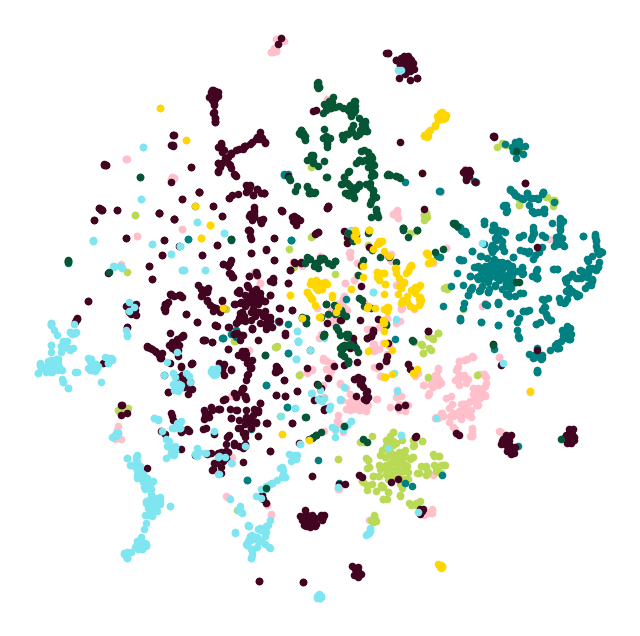

In [ ]:
@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700'
]
plot_points(colors)

## Downstream Task : Classification

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
model.eval()
# recuperer les plognements et les labels, transformez les en numpy arrays

X = model(torch.arange(data.num_nodes, device=device)).cpu().detach().numpy()
Y = data.y.numpy()

# Split data 0.9 entrainement et 0.1  test (votre code ici) : utilisez sklearn.model_selection.train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(
    "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
        X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
    )
)


Array shapes:
 X_train = (2437, 128)
 y_train = (2437,)
 X_test = (271, 128)
 y_test = (271,)


### Entrainez votre classificateur

Utilisez le classificateur : la régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Définition de LogisticRegressionCV
classifier = LogisticRegressionCV(cv=10, max_iter=300, multi_class='ovr', scoring='accuracy', verbose=False)

# Entrainement
classifier.fit(X_train, Y_train)

LogisticRegressionCV(cv=10, max_iter=300, multi_class='ovr', scoring='accuracy',
                     verbose=False)

### Prédire les classes des noeuds de test

In [ ]:
# Prédiction
Y_pred = classifier.predict(X_test)

### Calculer l'accuracy de votre classificateur

In [ ]:
# Calcul de la précision
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy :", accuracy)

Accuracy : 0.7527675276752768
